# Food Code Violations

## By: Nicholas Myers

Food Safety is extraordinarily important when it comes to the overall safety of a neighborhood. It'd be horrible if one were to go out to the local grocery store or restaurant, only for them to have unsafe food preperation/storage conditions. To combat this, I dedicated my ~~life~~ project to determining what neighborhood has the safest restaurants/stores.

In [2]:
# import the important things
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

foodCodeViolations = pd.read_csv("Food-Code-Violations.csv")

#Grab the length so we know what kind of behemoth we're working with:
len(foodCodeViolations)

336745

That's a lot. The csv is 98MB and has data going back to 2014, as well as goes into detail about every establishment in the county. However, since this concerns Pittsburgh neighborhoods, we can weed out the ones from outside of the city.

In [3]:
#makes a subdivision of the original csv, except it only counts the ones in Pittsburgh
#I'm using the 'municipal' tab, since all of the wards in Pittsburgh contain 'Pittsburgh-1'(ward number).
#Ergo, Rather than getting once with the city labeled as Pittsburgh
quearyMask = foodCodeViolations['municipal'].str.contains("Pittsburgh-")
pghFoodCodeViolations = foodCodeViolations[quearyMask]
len(pghFoodCodeViolations)

122888

Much better. From this, we can get a count of how health code violations are distributed by neighborhoods.

In [6]:
#makes a dictonary to count the total amount of violations a neighborhood has
hoodVios = {"Ward":[], "Total Violations":[]}
for i, row in pghFoodCodeViolations.iterrows():
    wardNo = int(row['municipal'][12:])
    if wardNo not in hoodVios["Ward"]:
        hoodVios["Ward"].append(wardNo)
        hoodVios["Total Violations"].append(1)
    else:
        hoodVios["Total Violations"][hoodVios["Ward"].index(wardNo)] += 1
        
#turns the completed dictonary into a pandas series
violationsByHood = pd.DataFrame(hoodVios)
violationsByHood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Ward              32 non-null     int64
 1   Total Violations  32 non-null     int64
dtypes: int64(2)
memory usage: 640.0 bytes


Unfortunately, it seems that the only data avaliable is for the wards, and not the neighborhoods. Fortunately, the 32 wards are just another subdivison of the 90 neighborhoods. If we're lucky, some neighborhoods are their own ward, like Carrick (the best), otherwise, we could get at a cluster of about 2 or three neighborhoods. Either way, we determine what ward/area has the unsafest food facilities.

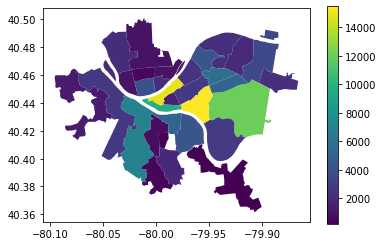

In [7]:
#creates map of wards
wards = geopandas.read_file("pittsburghpawards/Wards.shp")
#merges the data and creates a map
violationsMap = wards.merge(violationsByHood, how="left", left_on="ward", right_on="Ward")
violationsMap.plot(column = 'Total Violations', legend = True)

Nice Job, Carrick

Although not perfect, it most certainly is something. What this map shoes is that a lot of the neighborhoods in the central part of the city are riddled with health code violations, while much of the South Hills and North Shore seem to lack them. Although, we can make a table to view which wards have the most/least amount of violations.

In [8]:
violationsByHood.sort_values("Total Violations", ascending = False).head()

,Ward,Total Violations
5,4,15489
14,2,14942
4,14,12081
0,1,9657
9,19,6946


Now, I can manually determine which neighborhoods are in each ward. I used [this](https://www.arcgis.com/apps/mapviewer/index.html?webmap=2df51c8e9ff8434cbed266238ceaea30) map from the internet.

**Ward 4: Oakland** (includes North Oakland, Central Oakland, West Oakland, and South Oakland)

**Ward 2: Strip District & much of Downtown**

**Ward 14: Squirrel Hill North/South, Point Breeze, Swisshelm Park, and Regent Square**

**Ward 1: Bluff & the rest of Downtown (not covered by Ward 2)**

**Ward 19: Beechview, Mt. Washington, South Shore, Duquesne Heights, andMuch of Brookline**

As for the safest:

In [9]:
violationsByHood.sort_values("Total Violations").head()

,Ward,Total Violations
30,30,226
26,31,276
16,32,477
31,25,517
28,18,737


As for the neighborhoods in these wards:

**Ward 30: Knoxville**

**Ward 31: Hays, New Homestead, Lincoln Place**

**Ward 32: Overbrook and half of Brookline (not included in Ward 19)**

**Ward 25: A Majority of Central North Side**

**Ward 18: Bon Air, Beltzhoover, Allentown**

## Conclusion:

While this experiment is slightly flawed (i.e., there are a higher amound of restaurants in the Strip District compared to Knoxville), but nonethless, it shows a pattern. Considering there are a considerable number of health code violations in Central Pittsburgh is notable. If one were to avoid such areas with high violation rates (16000 violations in 10 years on a few dozen city blocks?), then the food may not be as safe. While I have a bias for Carrick, it wouldn't be a bad neighborhood in this scenario. However, with my personal experiences, a neighborhood like **Brookline** might be optimal, considering Brookline Boulevard and West Liberty both are bustling little communities with numerous restaurants and buisnesses (as well as being in South Brookline; the part covered by Ward 32!). 

Assuming I had all of the time in the world, I would definitly do a violations per restaurant, and perhaps even use the coordinates to determine which neighborhood they're exactly in (since Knoxville winning the least amount of food violations is underwhelming; I can't name a single restaurant in Knoxville!)